Part 1 - Using Sample Dataset 

Step 1: Load Required Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

Step 2: Create or Load a Dataset

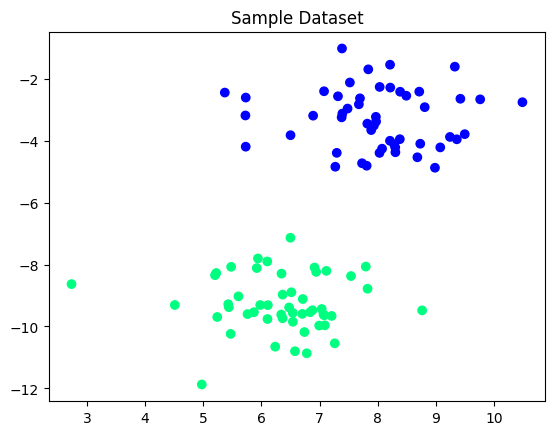

In [4]:
x, y = make_blobs(n_samples=100, centers=2, random_state=6)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter')
plt.title('Sample Dataset')     
plt.show()

Step 3: Split Data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Step 4: Train SVM Model

In [6]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Step 5: Predict and Evaluate

In [7]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



step 6: Visualize Decision Boundary

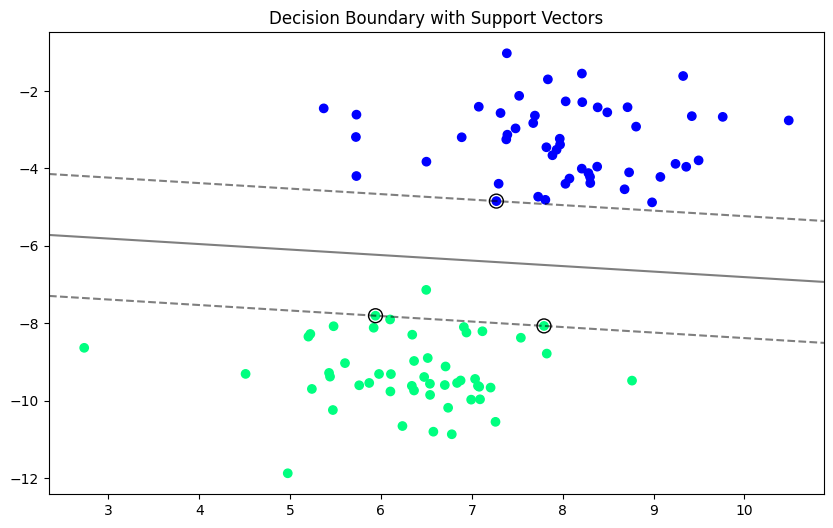

In [8]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title("Decision Boundary with Support Vectors")
    plt.show()

# Call the function
plot_decision_boundary(model, x, y)

Part 2 - Using email spam Dataset

Step 2: Load and Displaying first few rows Dataset

In [ ]:
df = pd.read_csv('..//Dataset//email_spam_dataset.csv')
print(df.head())
print("\nData Summary:\n", df.describe()) #Summarizing statistical properties
print("\nMissing Values:\n", df.isnull().sum()) #Checking for missing values

   email_length  num_links  has_attachment  num_exclamations  is_spam
0          1176          2               1                 6        0
1           910          3               1                 2        0
2          1344          3               0                 7        0
3          1180          1               0                 2        1
4          1145          4               0                 0        1

Data Summary:
        email_length   num_links  has_attachment  num_exclamations    is_spam
count    200.000000  200.000000      200.000000        200.000000  200.00000
mean     831.310000    2.020000        0.465000          4.270000    0.49500
std      410.430199    1.414071        0.500025          2.901585    0.50123
min       63.000000    0.000000        0.000000          0.000000    0.00000
25%      508.000000    1.000000        0.000000          2.000000    0.00000
50%      835.000000    2.000000        0.000000          4.000000    0.00000
75%     1176.750000    3.

Split and Label Separation in Spam Detection

In [11]:
X = df.drop('is_spam', axis=1)
y = df['is_spam']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train SVM Model

In [12]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False
